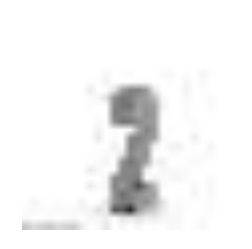

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
lenna_img = cv2.imread("/root/lena4.jpg")
plt.imshow(lenna_img)
plt.axis("off")#去除坐标轴
plt.show()

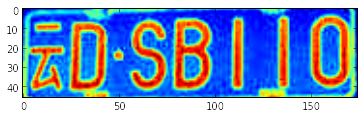

In [2]:
img = cv2.imread('/root/chepai.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.imshow('gray',img_gray)
plt.imshow(img_gray)
plt.show()


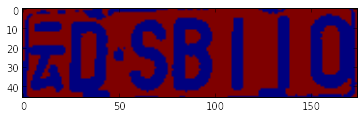

In [3]:
img_sec = img_gray
cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV, img_sec)
plt.imshow(img_sec)
plt.show()

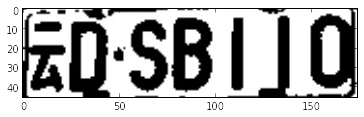

In [4]:
cv2.imwrite('/root/thre_res.jpg', img_sec) 
img_gray = cv2.imread('/root/thre_res.jpg')
plt.imshow(img_gray)
plt.show()

In [8]:
print img_gray.shape[0]

46


In [6]:
height = img_gray.shape[0]
width = img_gray.shape[1]
white = []
black = []
white_max,black_max = 0,0

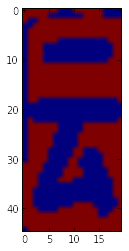

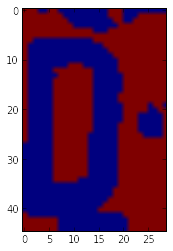

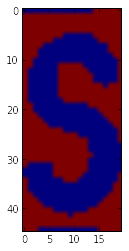

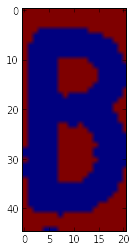

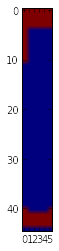

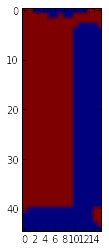

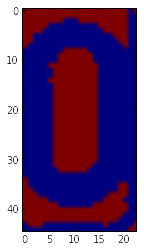

In [10]:
# 计算每一列的黑白色像素总和
for i in range(width):
    s = 0  # 这一列白色总数
    t = 0  # 这一列黑色总数
    for j in range(height):
        if img_sec[j][i] == 255:
            s += 1
        if img_sec[j][i] == 0:
            t += 1
    white_max = max(white_max, s)
    black_max = max(black_max, t)
    white.append(s)
    black.append(t)
    #print(s)
    #print(t)

arg = False  # False表示白底黑字；True表示黑底白字
if black_max > white_max:
    arg = True

# 分割图像
def find_end(start_):
    end_ = start_+1
    for m in range(start_+1, width-1):
        if (black[m] if arg else white[m]) > (0.95 * black_max if arg else 0.95 * white_max):  # 0.95这个参数请多调整，对应下面的0.05
            end_ = m
            break
    return end_

n = 1
start = 1
end = 2
while n < width-2:
    n += 1
    if (white[n] if arg else black[n]) > (0.05 * white_max if arg else 0.05 * black_max):
        # 上面这些判断用来辨别是白底黑字还是黑底白字
        # 0.05这个参数请多调整，对应上面的0.95
        start = n
        end = find_end(start)
        n = end
        if end-start > 5:
            cj = img_sec[1:height, start:end]
            #cv2.imshow('caijian', cj)
            #cv2.waitKey(0)
            plt.imshow(cj)
            plt.show()